# Language detection project

The aim of this project is to predict in what language the given text is written. For this reason a dataset with text data was chosen from [Kaggle](https://www.kaggle.com/code/martinkk5575/language-detection/input?fbclid=IwY2xjawGpzplleHRuA2FlbQIxMAABHVMGzCcvVVvOC15te-Xpy57EbrIjXjE2qR0IjOcuz1vnnfOkQBCzaHAyIw_aem_JEXACTp_kfxcu-SR83l6qQ).
Only a sample of this dataset were the given text was written in English, Estonian, Portuguese, Spanish and Turkish languages was chosen.

Two packages consisting pretrained language detection models were compared - Langdetect and LangID.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('test_data.csv', encoding='utf-8')
df.head()

,Text,language
0,in the mid-s the school district was sued for ...,English
1,in tom hamilton also began playing with joe r...,English
2,in the early s he evolved his psychedelic rock...,English
3,ağustos tarihinde orta öğretim genel müdürlü...,Turkish
4,sharon isbin comenzó sus estudios a los nueve ...,Spanish


In [3]:
df['language'].value_counts()

Portugese    214
English      205
Spanish      201
Estonian     192
Turkish      188
Name: language, dtype: int64

The number of records in each language is close to each other.

In [4]:
from langdetect import detect
from langdetect import DetectorFactory

def detect_language(text):
    """
    Input: any text.
    Output: predicted language of input text. Predictions are done using langdetect library.
    """
    DetectorFactory.seed = 0
    try:
        language = detect(text)
        return language
    except Exception as e:
        print('An error occured: ', e)
        return None

In [5]:
df['predicted_language_code'] = df['Text'].apply(detect_language)
df.head()

,Text,language,predicted_language_code
0,in the mid-s the school district was sued for ...,English,en
1,in tom hamilton also began playing with joe r...,English,en
2,in the early s he evolved his psychedelic rock...,English,en
3,ağustos tarihinde orta öğretim genel müdürlü...,Turkish,tr
4,sharon isbin comenzó sus estudios a los nueve ...,Spanish,es


In [6]:
df['predicted_language_code'].value_counts()
# en - English
# pt - Portuguese
# es - Spanish
# tr - Turkish
# et - Estonian
# nl - Dutch
# de - German
# ru - Russian
# sl - Slovenian
# it - Italian
# fr - French

en    229
pt    203
es    196
tr    182
et    182
nl      2
de      2
ru      1
sl      1
it      1
fr      1
Name: predicted_language_code, dtype: int64

As can be seen from the results some text was classified as written in a language which did not appear in a chosen sample (Dutch, German, Russian, Slovenian, Italian and French). This happened due to the fact that Langdetect searches through all languages that it is pretrained on and lacks functionality of declaring the list of possible languages of given text.

In [ ]:
def ISO_to_lang(lang_code):
    """
    Function converts language ISO 639-1 code to language name
    Languages that did not appear as class labels in the used sample are grouped as 'Other'
    """
    if lang_code == 'en':
        return 'English'
    elif lang_code == 'pt':
        return 'Portugese'
    elif lang_code == 'es':
        return 'Spanish'
    elif lang_code == 'tr':
        return 'Turkish'
    elif lang_code == 'et':
        return 'Estonian'
    else:
        return 'Other'

In [8]:
df['predicted_language'] = df['predicted_language_code'].apply(ISO_to_lang)
df.head()

,Text,language,predicted_language_code,predicted_language
0,in the mid-s the school district was sued for ...,English,en,English
1,in tom hamilton also began playing with joe r...,English,en,English
2,in the early s he evolved his psychedelic rock...,English,en,English
3,ağustos tarihinde orta öğretim genel müdürlü...,Turkish,tr,Turkish
4,sharon isbin comenzó sus estudios a los nueve ...,Spanish,es,Spanish


In [9]:
df[df['predicted_language'] == 'Other']

,Text,language,predicted_language_code,predicted_language
41,heinrich johannes friedrich maria orsini und r...,Estonian,nl,Other
85,im medienwandel – cristoph schmidt – google-bo...,Estonian,de,Other
111,"frenkel m november ""[charles brenton huggins ...",Turkish,nl,Other
224,"p k pandajev ""мракобесие для простаков или как...",Estonian,ru,Other
288,vun kozlov et al eds nadzornye proizvodstva p...,Spanish,sl,Other
346,dissertatio epistolica de bombyce societati re...,Spanish,it,Other
528,lacordaire t histoire naturelle des insectes ...,Spanish,fr,Other
632,"schmähl d ""[charles brenton huggins nobel pri...",Turkish,de,Other


After further inspection of the text data it was noted that some entries had phrases written in another language than the one given in a class label, sometimes in the one that was found by Langdetect, but did not appear as a classlabel in the used dataset.

In [10]:
from sklearn.metrics import classification_report

print(classification_report(y_true=df['language'], y_pred=df['predicted_language']))

              precision    recall  f1-score   support

     English       0.90      1.00      0.94       205
    Estonian       1.00      0.95      0.97       192
       Other       0.00      0.00      0.00         0
   Portugese       1.00      0.94      0.97       214
     Spanish       1.00      0.98      0.99       201
     Turkish       1.00      0.97      0.98       188

    accuracy                           0.97      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.98      0.97      0.97      1000



c:\Users\manta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Langdetect model performed very well as it classified 97 % of the text correctly.

In [11]:
import langid

def detect_language_langid(text):
    """
    Input: any text.
    Output: predicted language of input text. Predictions are done using langdetect library.
    """
    langid.set_languages(['en', 'et', 'es', 'pt', 'tr'])
    try:
        language, confidence = langid.classify(text)
        return language
    except Exception as e:
        print(f'An error occured: {e}')
        return None

LangID has a functionality to predefine a list of possible languages. Thus the model will not output languages that did not appear as class labels in the sample data.

In [12]:
df['predicted_langid_code'] = df['Text'].apply(detect_language_langid)
df.head()

,Text,language,predicted_language_code,predicted_language,predicted_langid_code
0,in the mid-s the school district was sued for ...,English,en,English,en
1,in tom hamilton also began playing with joe r...,English,en,English,en
2,in the early s he evolved his psychedelic rock...,English,en,English,en
3,ağustos tarihinde orta öğretim genel müdürlü...,Turkish,tr,Turkish,tr
4,sharon isbin comenzó sus estudios a los nueve ...,Spanish,es,Spanish,es


In [13]:
df['predicted_language_langid'] = df['predicted_langid_code'].apply(ISO_to_lang)
df.head()

,Text,language,predicted_language_code,predicted_language,predicted_langid_code,predicted_language_langid
0,in the mid-s the school district was sued for ...,English,en,English,en,English
1,in tom hamilton also began playing with joe r...,English,en,English,en,English
2,in the early s he evolved his psychedelic rock...,English,en,English,en,English
3,ağustos tarihinde orta öğretim genel müdürlü...,Turkish,tr,Turkish,tr,Turkish
4,sharon isbin comenzó sus estudios a los nueve ...,Spanish,es,Spanish,es,Spanish


In [14]:
print(classification_report(y_true=df['language'], y_pred=df['predicted_language_langid']))

              precision    recall  f1-score   support

     English       0.88      1.00      0.94       205
    Estonian       1.00      0.94      0.97       192
   Portugese       0.99      0.95      0.97       214
     Spanish       0.99      0.98      0.99       201
     Turkish       0.99      0.97      0.98       188

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



LangID showed similar results to Langdetect as once again 97 % of the data was classified correctly.

In [17]:
from sklearn.metrics import confusion_matrix

def plot_Confusion_Matrix(y_true, y_pred, labels, title, cmap):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, 
    xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

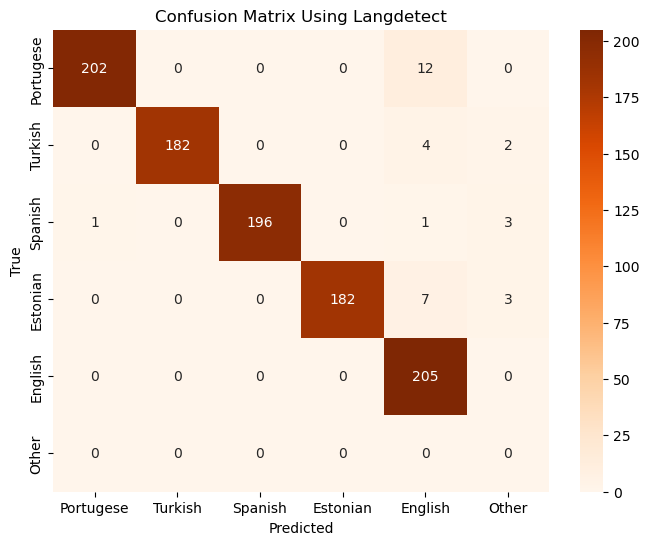

In [ ]:
plot_Confusion_Matrix(df['language'], df['predicted_language'], labels=['Portugese', 'Turkish', 'Spanish', 'Estonian', 'English', 'Other'], 
                      cmap='Oranges', title = "Confusion Matrix Using Langdetect")

From the confusion matrix we can see that using Langdetect all of the entries written in English were classified correctly. Meanwhile the most common mistake was predicting English when the text was written in another language, especially Portuguese and Estonian.

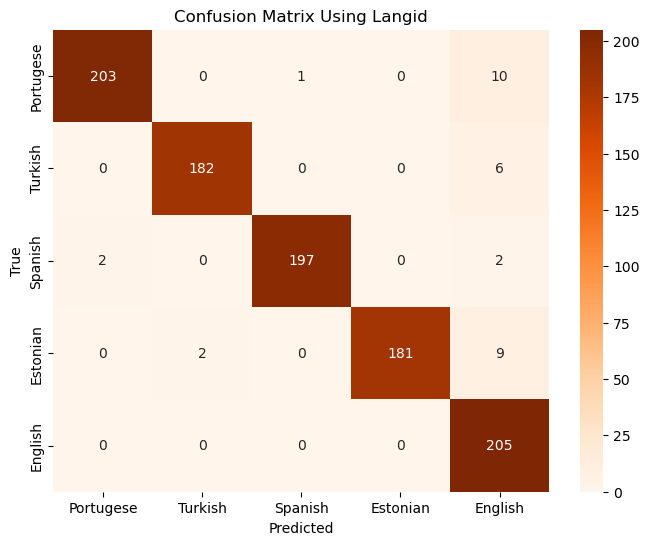

In [19]:
plot_Confusion_Matrix(df['language'], df['predicted_language_langid'], labels=['Portugese', 'Turkish', 'Spanish', 'Estonian', 'English'], 
                      cmap='Oranges', title = "Confusion Matrix Using Langid")

Same tendencies appear in LangID. All English text was classified correctly, meanwhile the most common mistakes were classifyong Portuguese and Estonian texts as English.

## Conclusions

- Pretrained language detection models in Langdetect and LangID packages perform extremelly well for predicting in what language the text is written. Both methods achieved 97 % accuracy for a given dataset.
- LangID has an advantage that a set of possible languages can be predefined in the model.
- All English text was classified correctly.
- Most common mistakes were classifying text as English when it was written in another languages. This was most apparent for Portuguese and Estonian languages. However the number of mistakes made was still extremely low.